In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
master_login_df = pd.read_json('logins.json')

In [3]:
master_login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
date_time_df = pd.DataFrame()
date_time_df = master_login_df

In [5]:
date_time_df.isnull().sum()

login_time    0
dtype: int64

In [6]:
len(date_time_df)

93142

**Resample with  15 min time interval**

In [7]:
date_time_df.set_index('login_time', inplace=True)
date_time_df['login_count'] = 1
date_time_df = date_time_df.resample('15T').sum()

In [8]:
date_time_df.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [9]:
login_time_df = date_time_df.index

In [76]:
date_time_df['day'] = login_time_df.day
date_time_df['month'] = login_time_df.month
date_time_df['year'] = login_time_df.year
date_time_df['weekday'] = login_time_df.weekday

In [77]:
date_time_df.head()

,login_count,day,month,year,weekday
login_time,,,,,
1970-01-01 20:00:00,2,1,1,1970,3
1970-01-01 20:15:00,6,1,1,1970,3
1970-01-01 20:30:00,9,1,1,1970,3
1970-01-01 20:45:00,7,1,1,1970,3
1970-01-01 21:00:00,1,1,1,1970,3


In [78]:
#date_time_df.set_index('login_time',inplace=True)

Text(0.5, 1.0, 'No of logins in 15 min of time interval')

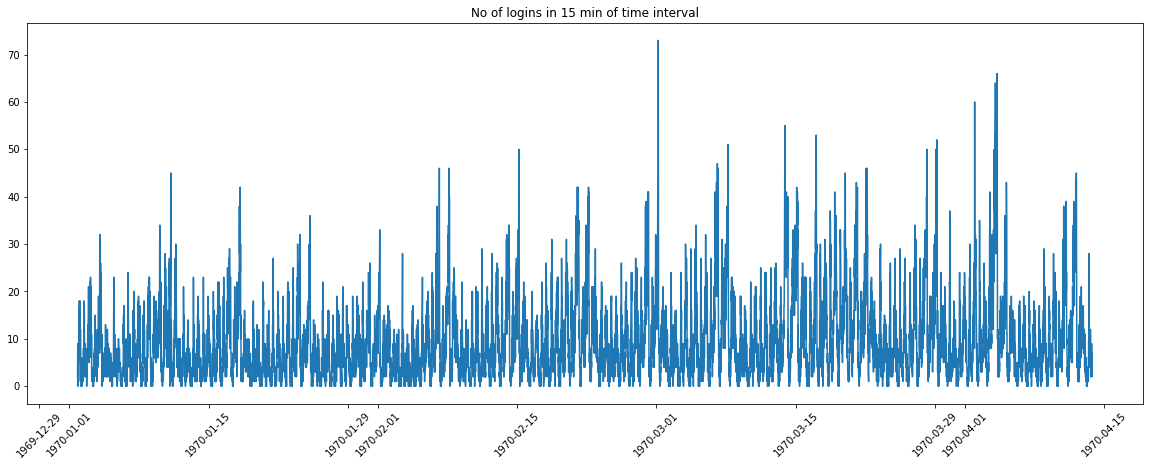

In [79]:
plt.figure(figsize=(20,7))
plt.plot(date_time_df['login_count'])
plt.xticks(rotation=45)
plt.title("No of logins in 15 min of time interval")

**No of login month wise**

Text(0.5, 1.0, 'No of logins per month')

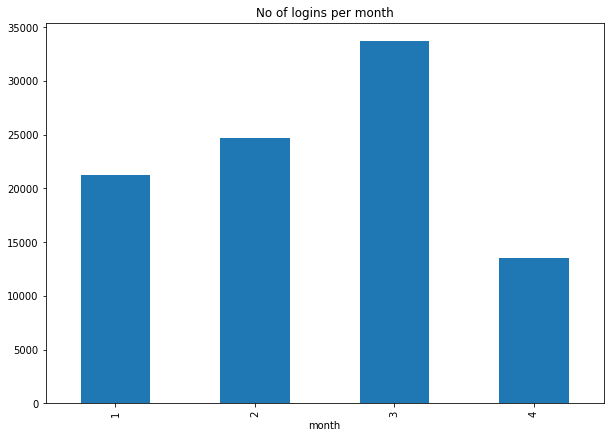

In [80]:
plt.figure(figsize=(10,7))
date_time_df.groupby('month')['login_count'].sum().plot.bar()
plt.title("No of logins per month")

### Month Wise Analysis

**Here is the four month login data. The amount of logins activity almost same in Jan(1) amd Feb(2) and bit more incread in March. but there is sharp downgrade in April?  This could be bad business month or could be incomplete data collection in April**

In [81]:
jan_df = date_time_df[date_time_df['month']==1]
feb_df = date_time_df[date_time_df['month']==2]
mar_df = date_time_df[date_time_df['month']==3]
apr_df = date_time_df[date_time_df['month']==4]

In [82]:
jan_df.head()

,login_count,day,month,year,weekday
login_time,,,,,
1970-01-01 20:00:00,2,1,1,1970,3
1970-01-01 20:15:00,6,1,1,1970,3
1970-01-01 20:30:00,9,1,1,1970,3
1970-01-01 20:45:00,7,1,1,1970,3
1970-01-01 21:00:00,1,1,1,1970,3


In [83]:
def trends(df,title):
    list = [1,2,3,4,5,6,7]
    days_list = pd.Series(list) 
    jan_days = df['day']
    for jan_days in days_list:
        temp_df = df[df['weekday'] == jan_days]
        if jan_days in [1,2,3,4,5]:
            color = 'red'
        else:
            color = 'green'
        plt.plot(temp_df['login_count'],'.',color=color)
        plt.xticks(rotation=45)
        plt.title(title)
        plt.ylim([0,75])   

### WeekDays and WeekEnd Logins Details

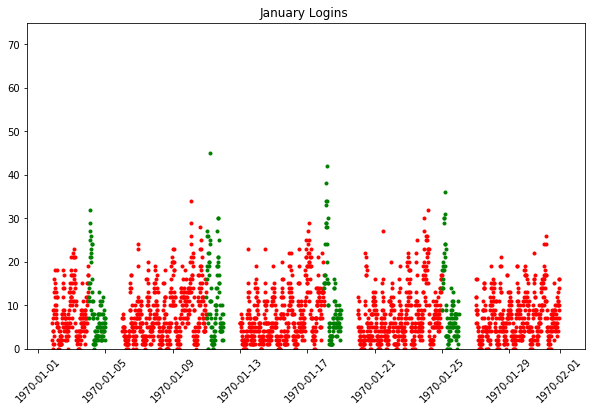

In [84]:
plt.figure(figsize=(10,6)) 
trends(jan_df, 'January Logins ')

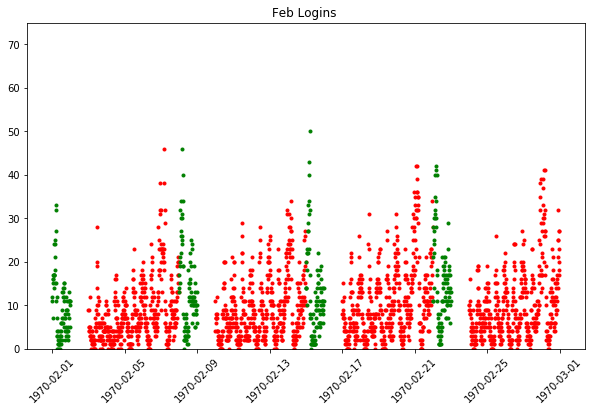

In [89]:
plt.figure(figsize=(10,6)) 
trends(feb_df, 'Feb Logins ')

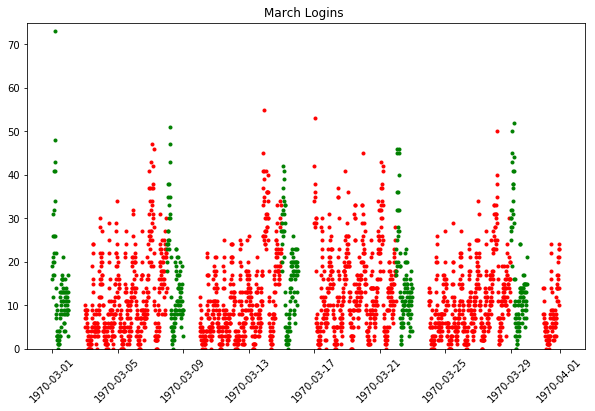

In [90]:
plt.figure(figsize=(10,6)) 
trends(mar_df, 'March Logins ')

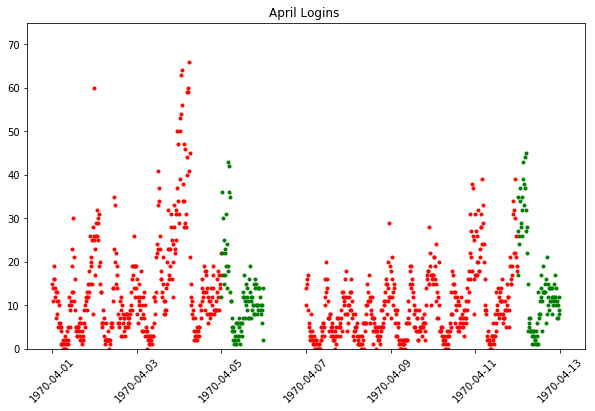

In [91]:
plt.figure(figsize=(10,6)) 
trends(apr_df, 'April Logins ')

**January and Feburary are almost similiar along with March which has slightly higher logins.**
**On other place April login came down may be because of data missing or not captured**